## <div align="center"> UJIAN TENGAH SEMESTER IF540-L MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> Klasifikasi Status Mahasiswa Menggunakan Algoritma Random Forest</div>

---
### Kelompok 4

#### Anggota Kelompok : 
1. Zabrina Devta Fisabilillah - 00000072715
2. Septyo Adi Dwi Putra - 00000080738
3. Desquita Sasyili Kheyla Syihab - 00000078279
4. Rifqah Aulia Salsabilla - 00000077820
5. Rachelle Stephanie Rianto - 00000082784

---

---

### Dataset yang digunakan untuk projek: https://www.kaggle.com/datasets/mikhail1681/student-performance-pip



### Exploratory Data Analysis (EDA) & Data Preprocessing


In [2]:
import os, warnings, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
import shap

c:\Users\septy\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
SEED = 81
student = pd.read_csv(r'C:\FIle Kuliah\Simester 5\Machine Lerning\UAS-UTS\Student.csv')

In [4]:
student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
print(f"This dataset contains {student.shape[0]} rows and {student.shape[1]} columns.")

This dataset contains 4424 rows and 37 columns.


In [7]:
missing_values = student.isnull().sum()
print("missing values :")
print(missing_values[missing_values > 0])

missing values :
GDP    419
dtype: int64


In [8]:
missing_values = student.isnull().sum()
descriptive_stats = student.describe()

In [9]:
missing_values_table = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values
})

In [10]:
print("Missing Values Table:")
display(missing_values_table)

Missing Values Table:


,Column,Missing Values
0,Marital status,0
1,Application mode,0
2,Application order,0
3,Course,0
4,Daytime/evening attendance\t,0
5,Previous qualification,0
6,Previous qualification (grade),0
7,Nacionality,0
8,Mother's qualification,0
9,Father's qualification,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = student.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
columns_to_normalize = ['Previous qualification (grade)', 'Curricular units 2nd sem (credited)',
                        'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                        'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
                        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 
                        'Inflation rate', 'GDP']

student[columns_to_normalize] = scaler.fit_transform(student[columns_to_normalize])
student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,0.284211,1,19,12,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,Graduate
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,Dropout
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,Graduate
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,Graduate


In [359]:
data_cleaned = student.dropna(subset=['GDP'])

In [360]:
display(data_cleaned)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,1,44,1,9070,1,39,120.0,1,3,38,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout


In [361]:
missing_percentage = data_cleaned.isnull().mean() * 100
display(missing_percentage)

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

c:\Users\septy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\septy\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


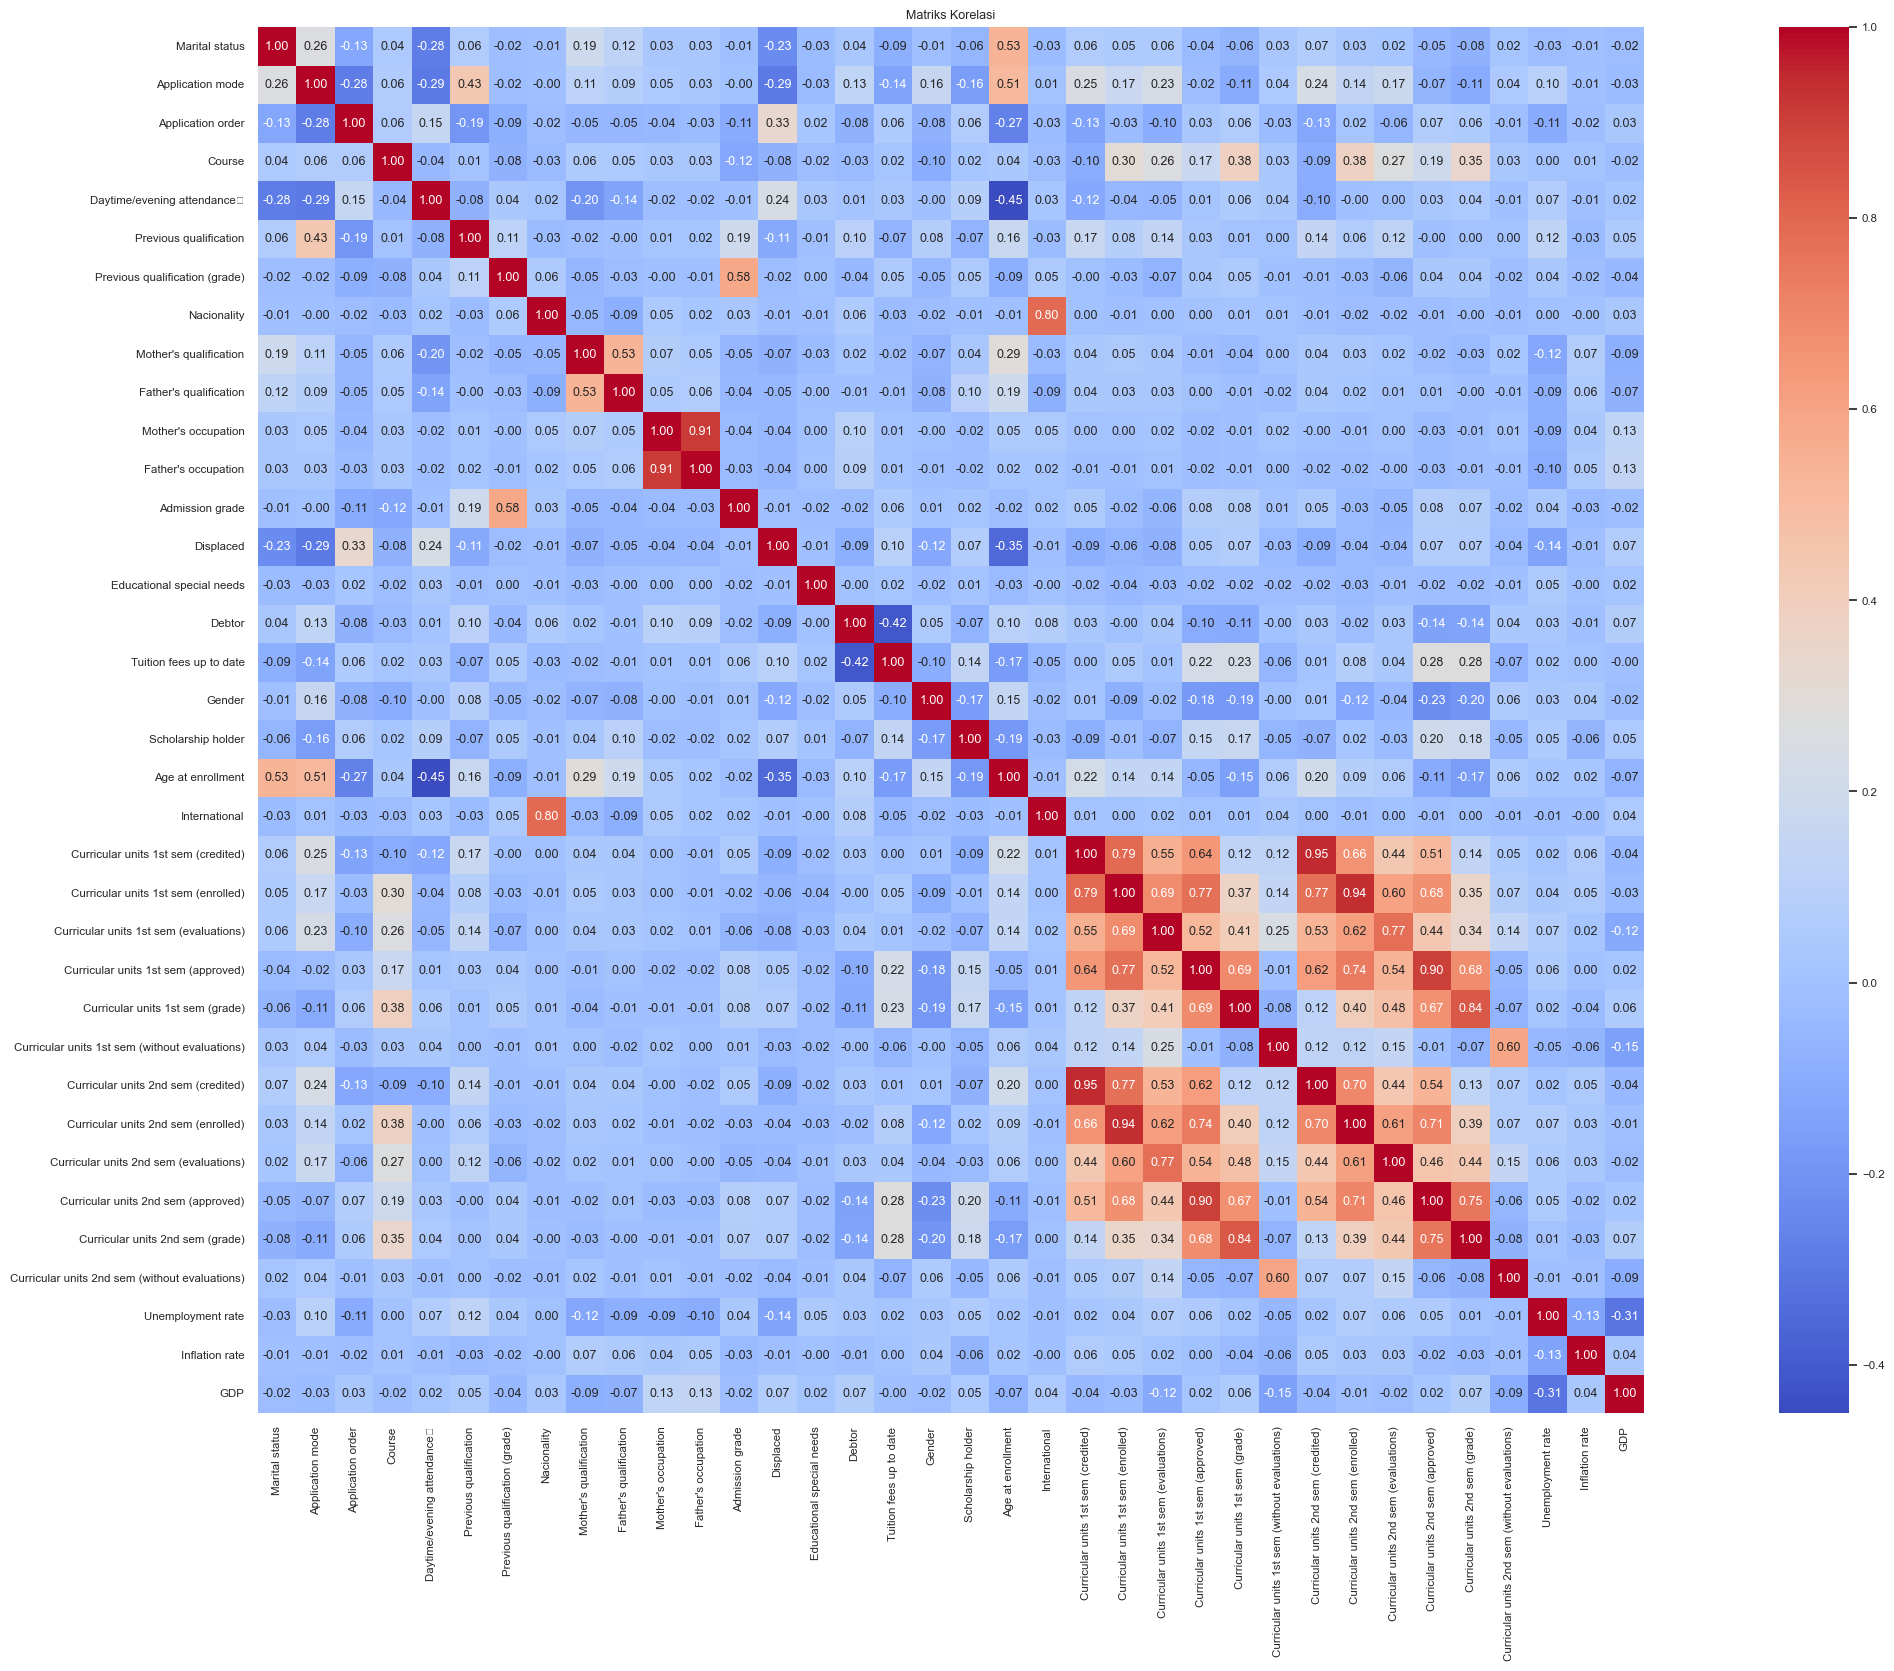

In [362]:
data_numeric = data_cleaned.select_dtypes(include=['number'])

# Membuat matriks korelasi
correlation_matrix = data_numeric.corr()

# Menampilkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(35, 18))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

C:\Users\septy\AppData\Local\Temp\ipykernel_19216\1812231114.py:15: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\septy\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


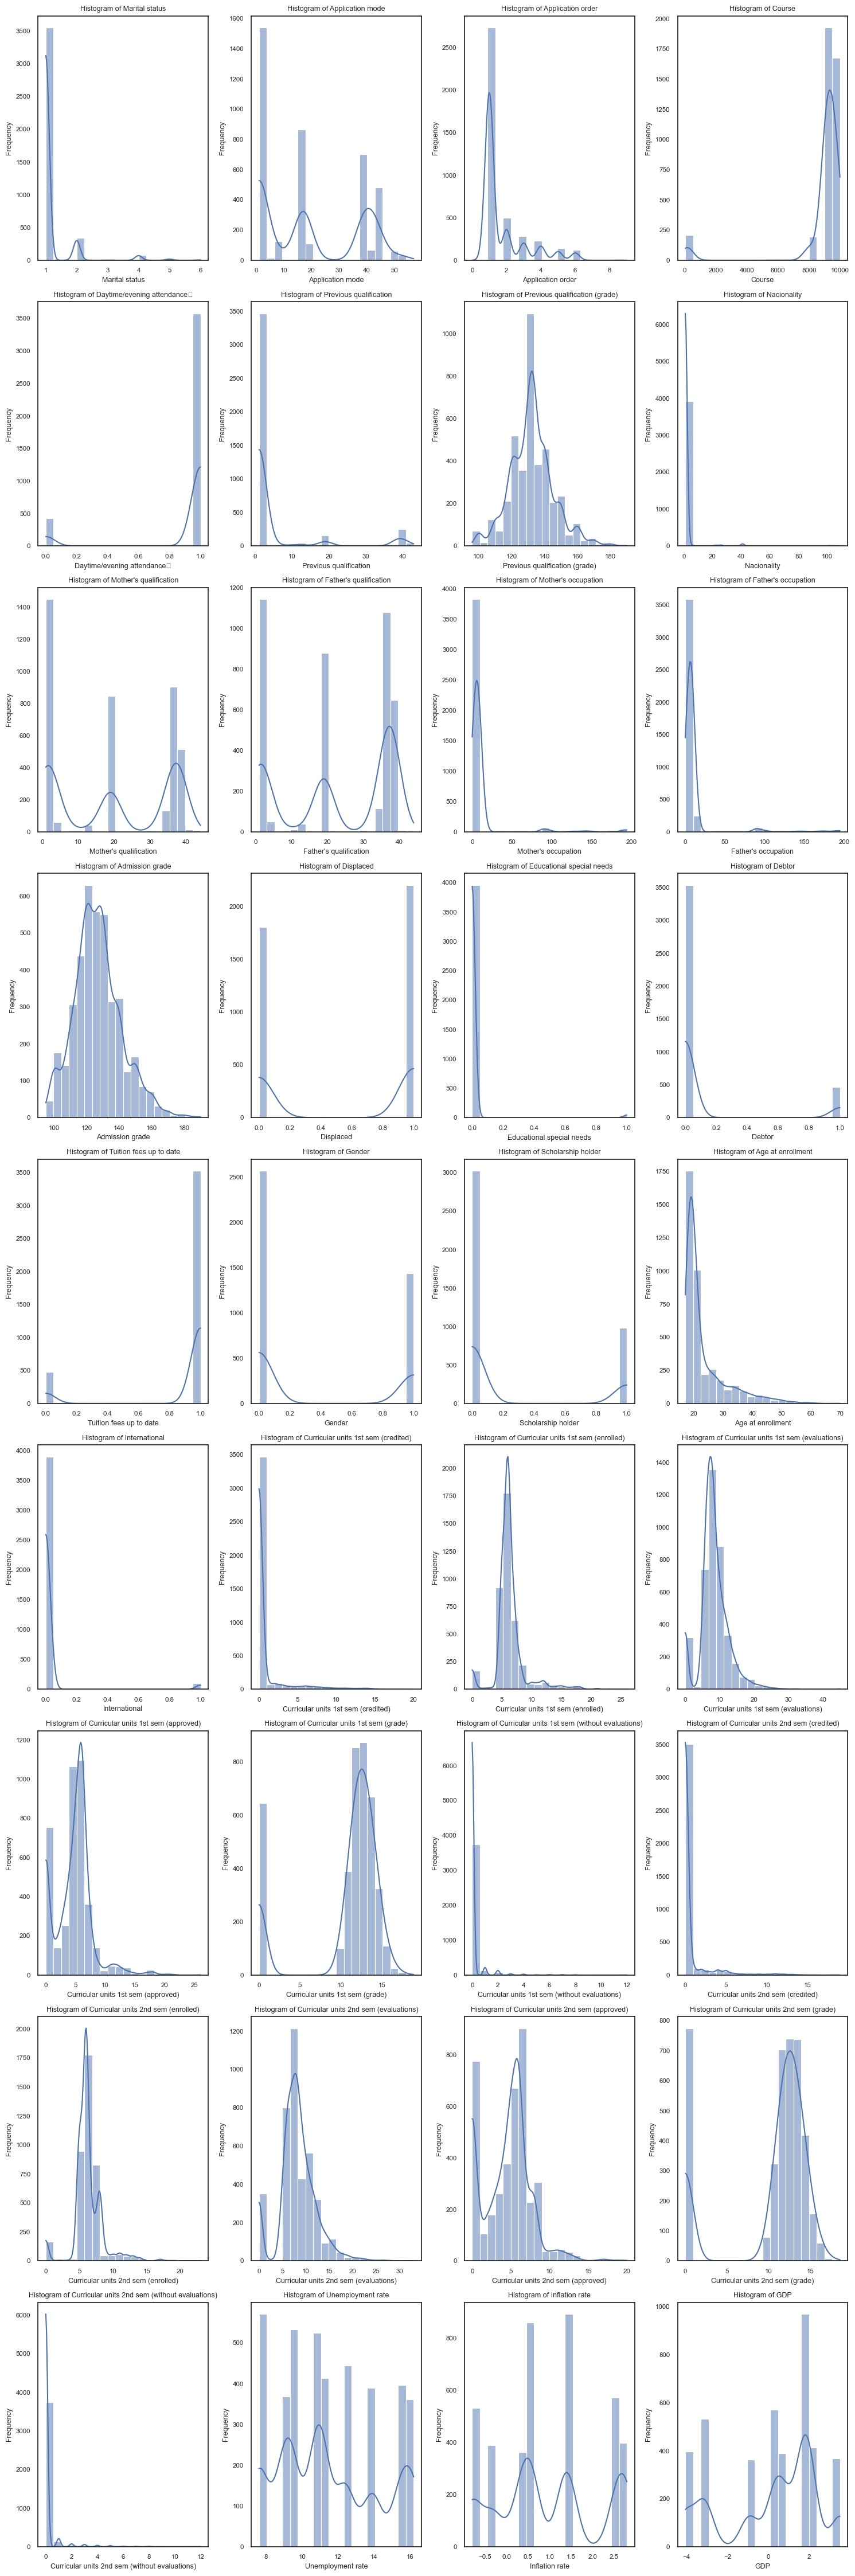

In [363]:
data_numeric = data_cleaned.select_dtypes(include=['number'])

# Mengatur jumlah kolom dalam subplot
num_cols = 4
num_rows = (len(data_numeric.columns) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(data_numeric.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data_numeric[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\septy\AppData\Local\Temp\ipykernel_19216\746409110.py:7: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\septy\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


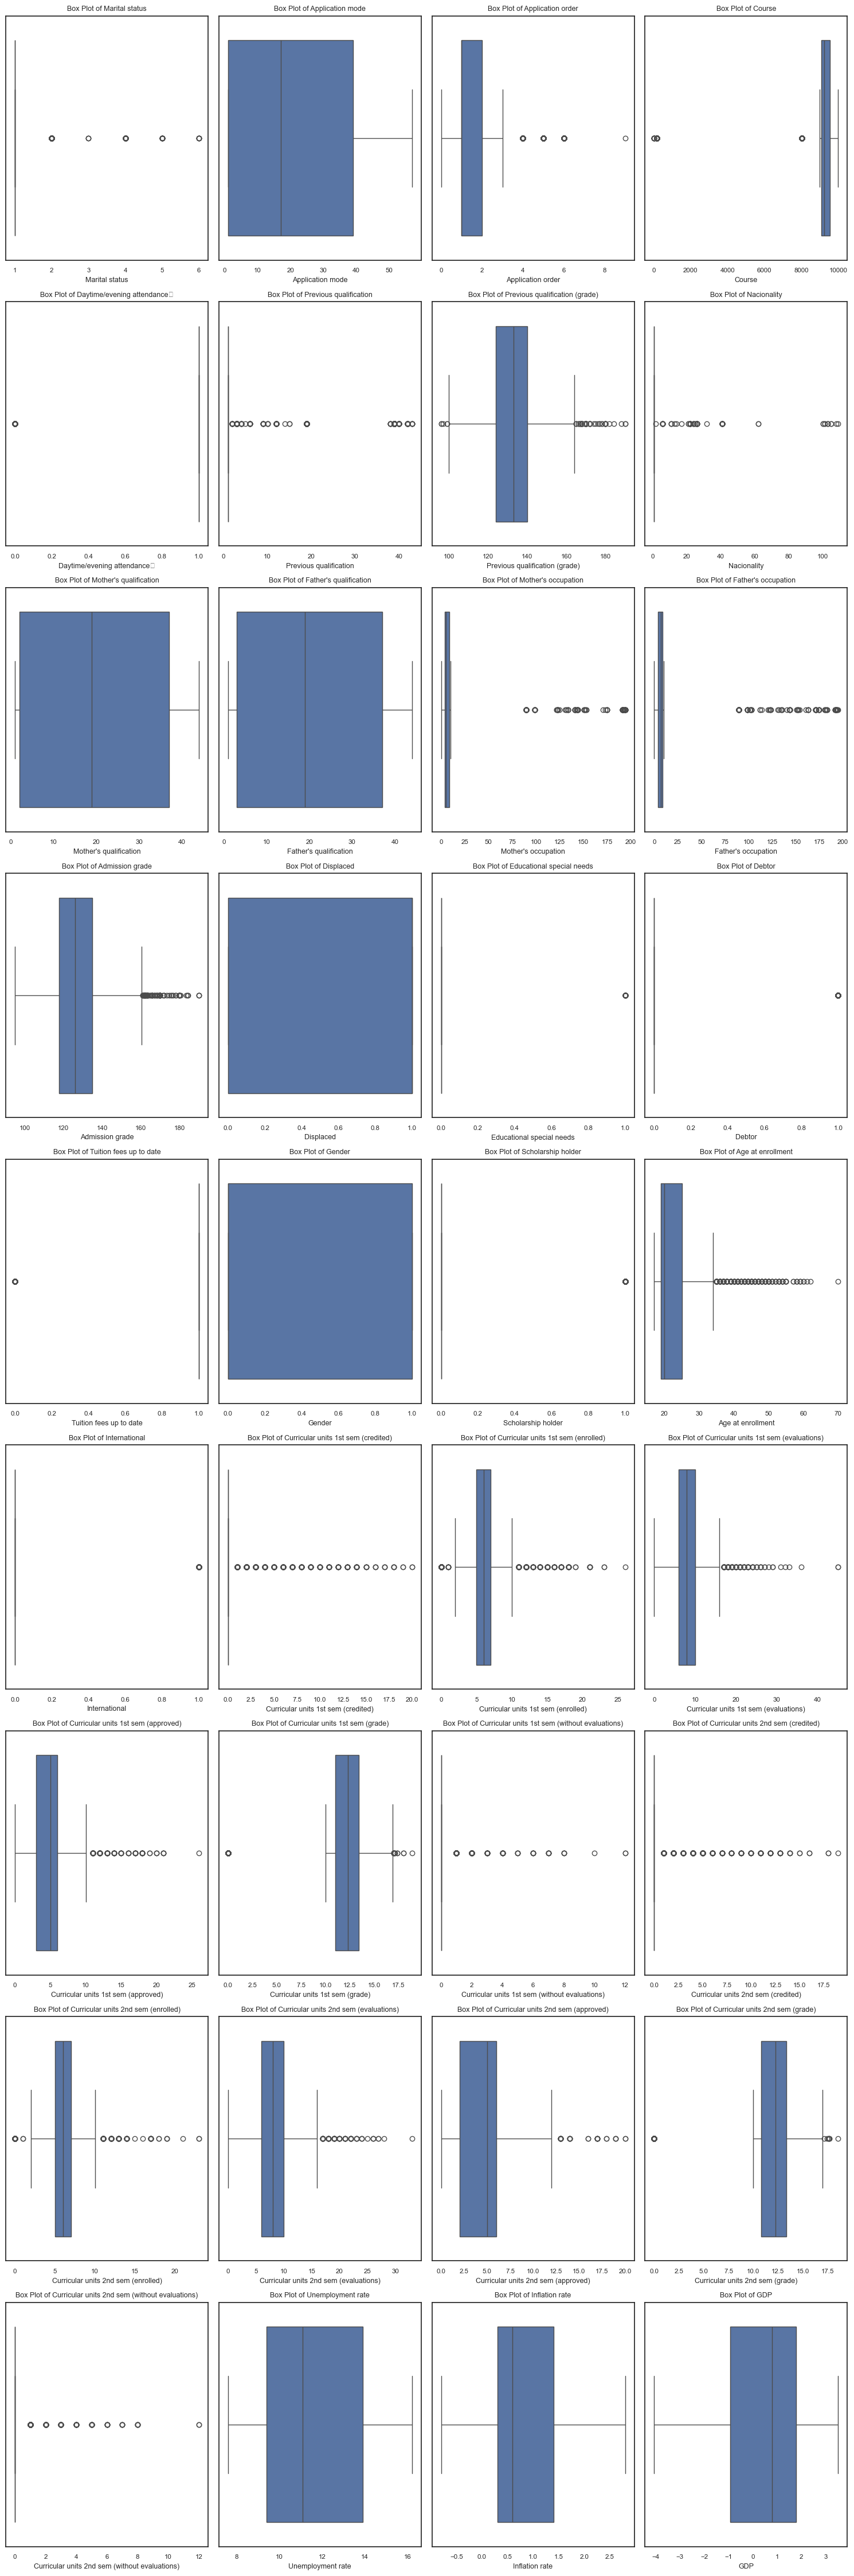

In [364]:
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(data_numeric.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=data_numeric[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

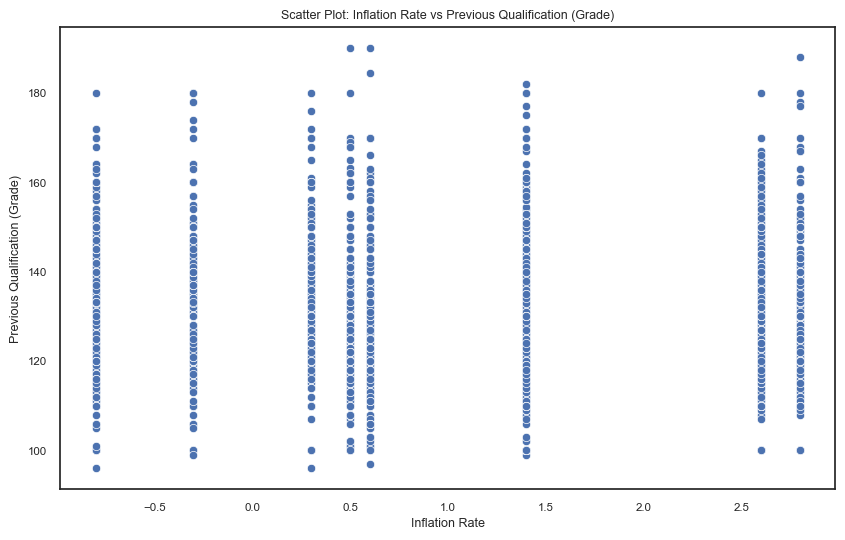

In [365]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_numeric, x='Inflation rate', y='Previous qualification (grade)')
plt.title('Scatter Plot: Inflation Rate vs Previous Qualification (Grade)')
plt.xlabel('Inflation Rate')
plt.ylabel('Previous Qualification (Grade)')
plt.show()

In [366]:
data_cleaned.columns = [col.strip().replace(" ","_") for col in data_cleaned.columns.tolist()]

In [367]:
l1 = []
for col in data_cleaned.columns:
    l1.append((col,data_cleaned[col].nunique()))

nu_data_cleaned = pd.DataFrame(l1, columns=['feature','n_unique'])
nu_data_cleaned.sort_values(by='n_unique',ascending=True).style.background_gradient(cmap='Oranges')

,feature,n_unique
18,Scholarship_holder,2
20,International,2
17,Gender,2
16,Tuition_fees_up_to_date,2
4,Daytime/evening_attendance,2
15,Debtor,2
14,Educational_special_needs,2
13,Displaced,2
36,Target,3
0,Marital_status,6


In [368]:
one_hot_col = nu_data_cleaned[nu_data_cleaned['n_unique'] == 2]["feature"].tolist()
data_cleaned[one_hot_col]

,Daytime/evening_attendance,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International
0,1,1,0,0,1,1,0,0
1,1,1,0,0,0,1,0,0
2,1,1,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
4418,1,0,0,0,1,1,0,0
4419,1,0,0,0,1,1,0,0
4420,1,1,0,1,0,0,0,1
4421,1,1,0,0,1,0,1,0


In [369]:
cat_col = ["Marital_status", "Previous_qualification","Course", 
           "Application_mode", "Nacionality","Mother's_qualification",
           "Father's_qualification","Mother's_occupation","Father's_occupation",
           "Application_order"]


In [370]:
target = "Target"

## numerical columns
num_col = [col for col in data_cleaned.columns if col not in cat_col+[target]+one_hot_col]
num_col

['Previous_qualification_(grade)',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_(credited)',
 'Curricular_units_1st_sem_(enrolled)',
 'Curricular_units_1st_sem_(evaluations)',
 'Curricular_units_1st_sem_(approved)',
 'Curricular_units_1st_sem_(grade)',
 'Curricular_units_1st_sem_(without_evaluations)',
 'Curricular_units_2nd_sem_(credited)',
 'Curricular_units_2nd_sem_(enrolled)',
 'Curricular_units_2nd_sem_(evaluations)',
 'Curricular_units_2nd_sem_(approved)',
 'Curricular_units_2nd_sem_(grade)',
 'Curricular_units_2nd_sem_(without_evaluations)',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [371]:
data_cleaned[target].value_counts() / data_cleaned.shape[0] * 100

Target
Graduate    49.787765
Dropout     31.960050
Enrolled    18.252185
Name: count, dtype: float64

In [372]:
data_cleaned[cat_col].describe().style.background_gradient(cmap='Oranges')

,Marital_status,Previous_qualification,Course,Application_mode,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,Father's_occupation,Application_order
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,1.174282,4.797004,8844.293383,18.768789,1.902122,19.501124,22.157303,11.088140,11.198252,1.725593
std,0.596014,10.504126,2073.290103,17.524066,7.016849,15.618639,15.336900,27.023466,25.868648,1.307153
min,1.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,1.000000
50%,1.000000,1.000000,9238.000000,17.000000,1.000000,19.000000,19.000000,5.000000,7.000000,1.000000
75%,1.000000,1.000000,9556.000000,39.000000,1.000000,37.000000,37.000000,9.000000,9.000000,2.000000
max,6.000000,43.000000,9991.000000,57.000000,109.000000,44.000000,44.000000,194.000000,195.000000,9.000000


Train & Test

In [373]:
target_encoder = {
    "Graduate":0,
    "Dropout":1,
    "Enrolled":2
}

target_decoder = dict(zip(target_encoder.values(),target_encoder.keys()))
data_cleaned[target] = data_cleaned[target].map(target_encoder)

C:\Users\septy\AppData\Local\Temp\ipykernel_19216\1141309681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[target] = data_cleaned[target].map(target_encoder)


In [374]:
X_train, X_val, y_train, y_val = train_test_split(data_cleaned.drop(target,axis=1), 
                                                    data_cleaned[target], 
                                                    test_size=0.1, 
                                                    random_state=SEED,
                                                    stratify=data_cleaned[target])

In [375]:
print(f"Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns and {y_train.ndim} target.")
print(f"Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns and {y_val.ndim} target.")

Training set has 3604 rows and 36 columns and 1 target.
Validation set has 401 rows and 36 columns and 1 target.


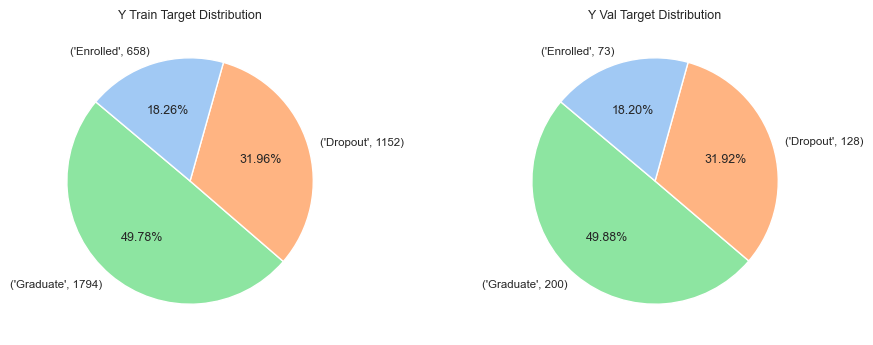

In [376]:
fig1, ax1 = plt.subplots(1,2,figsize=(11,4))
data = y_train.value_counts().sort_index(ascending=True)
ax1[0].pie(data,
        labels= [(target_decoder[l],s) for l, s in zip(data.index, data.values)],
        startangle=140, 
        colors=['#8de5a1','#ffb482','#a1c9f4'],
        autopct='%1.2f%%')
ax1[0].set_title("Y Train Target Distribution")

data = y_val.value_counts().sort_index(ascending=True)
ax1[1].pie(data,
        labels= [(target_decoder[l],s) for l, s in zip(data.index, data.values)],
        startangle=140, 
        colors=['#8de5a1','#ffb482','#a1c9f4'],
        autopct='%1.2f%%')
ax1[1].set_title("Y Val Target Distribution");

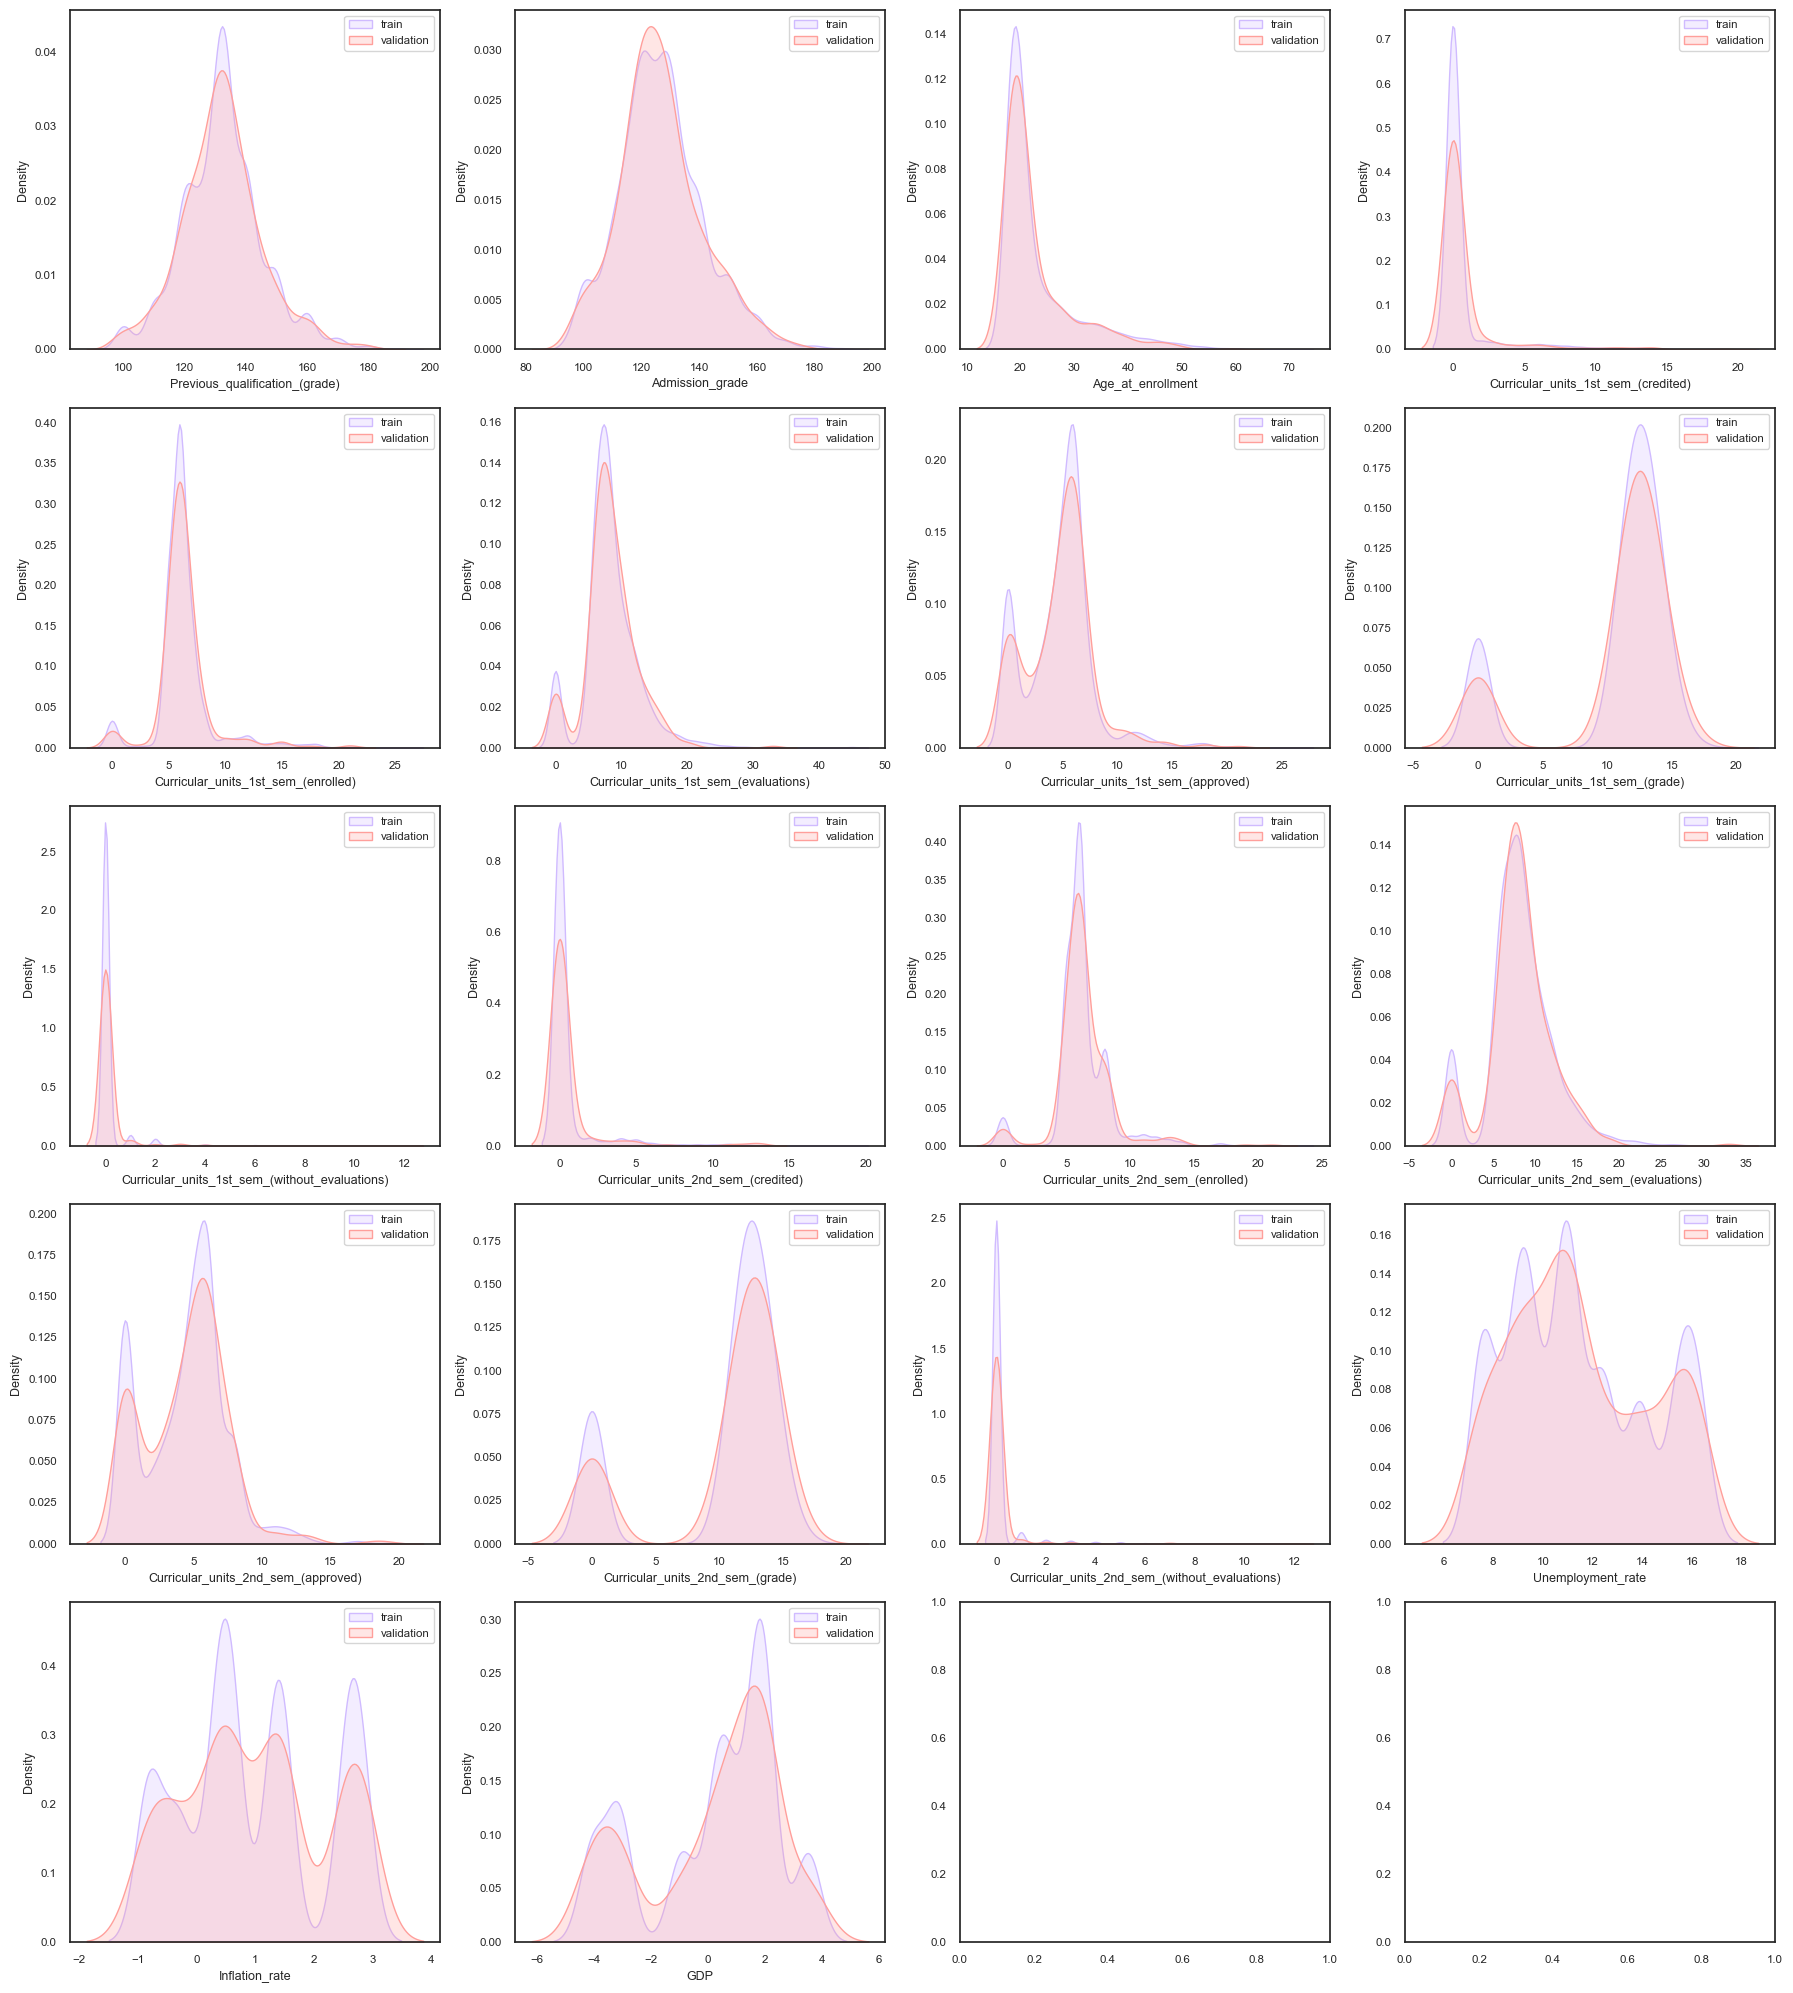

In [377]:
sns.set_style('white')
warnings.filterwarnings('ignore', category=FutureWarning)
fig1,ax1 = plt.subplots(5,4,figsize=(18,20))
ax1 = ax1.flatten()
i = 0
for col in X_train[num_col].columns:
#     sns.histplot(X_train[col],kde=True,ax=ax1[i], color='#d0bbff')
    sns.kdeplot(X_train[col],ax=ax1[i], color='#d0bbff', fill='#d0bbff',label="train") 
    sns.kdeplot(X_val[col],ax=ax1[i], color='#ff9f9b', fill='#ff9f9b',label="validation") 
    ax1[i].legend()
    i+=1
plt.tight_layout()

In [378]:
data_cleaned_train = X_train.merge(y_train,how='outer',left_index=True,right_index=True).reset_index(inplace=False,names=["id"])
data_cleaned_train[target] = data_cleaned_train[target].map(target_decoder)

In [379]:
data_cleaned.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [380]:
def plot_target_by_categorical(data, id_column, categorical_column, target_column, count_or_percent="count", color=None, static=True):
    # Menghitung jumlah berdasarkan kategori
    plot_data = data.groupby([categorical_column, target_column]).size().reset_index(name='counts')
    
    # Membuat plot
    plt.figure(figsize=(12, 6))
    
    # Menggunakan warna sesuai dengan parameter color
    if color is not None:
        sns.barplot(data=plot_data, x=categorical_column, y='counts', hue=target_column, palette=color)
    else:
        sns.barplot(data=plot_data, x=categorical_column, y='counts', hue=target_column)

    plt.title(f'Target Distribution by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Counts')
    plt.legend(title=target_column)
    
    
    if static:
        plt.show()
    else:
        return plot_data

,Course,Target,counts
0,33,Dropout,7
1,33,Enrolled,3
2,33,Graduate,1
3,171,Dropout,69
4,171,Enrolled,32
5,171,Graduate,76
6,8014,Dropout,63
7,8014,Enrolled,16
8,8014,Graduate,96
9,9003,Dropout,75


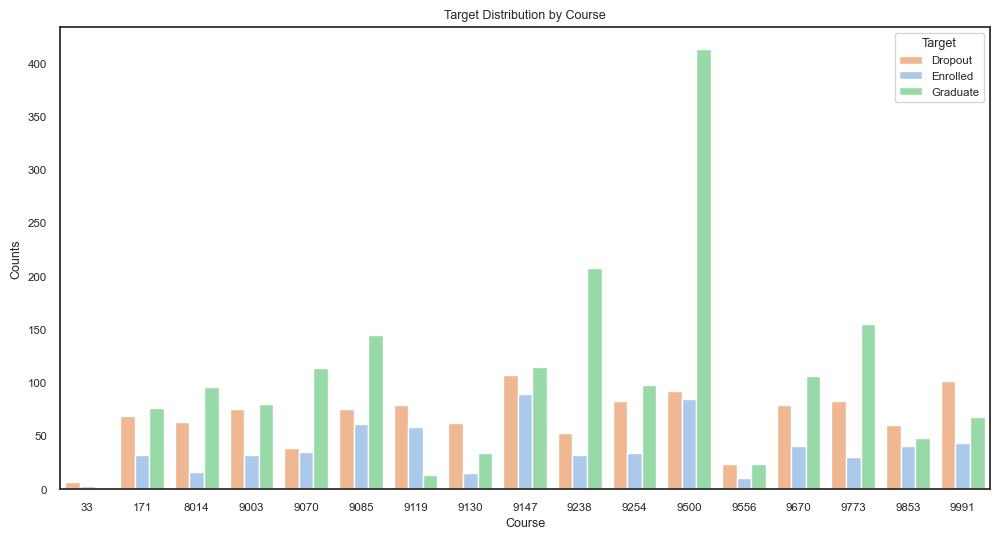

In [381]:
# Menggunakan fungsi tanpa unpacking
plot_target_by_categorical(
    data_cleaned_train, 
    "id", 
    'Course', 
    'Target', 
    "count", 
    color={
        "Dropout": '#ffb482', 
        "Enrolled": '#a1c9f4', 
        "Graduate": '#8de5a1'
    }, 
    static=False
)

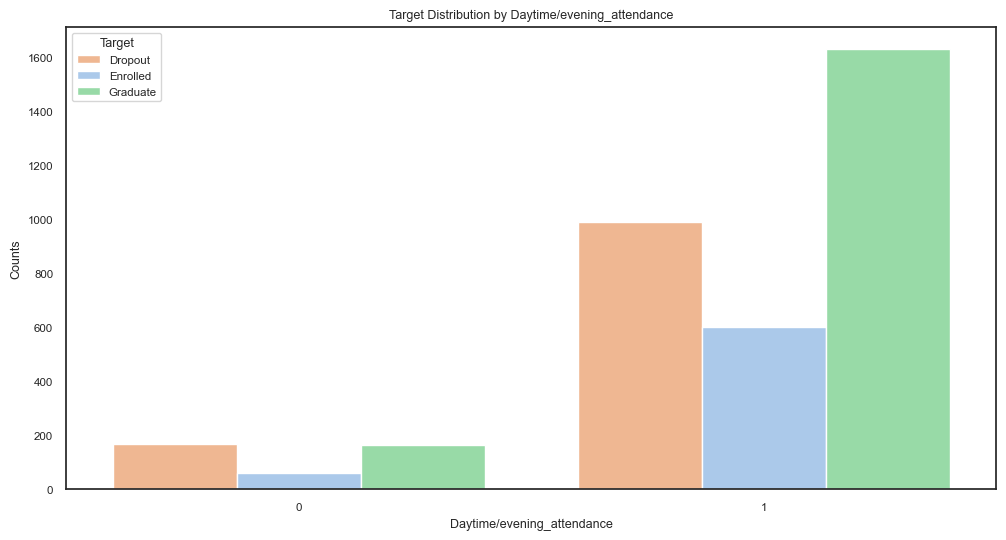

In [382]:
plot_target_by_categorical(data_cleaned_train,"id",'Daytime/evening_attendance',target,"count",color={"Dropout":'#ffb482', "Enrolled":'#a1c9f4',"Graduate":'#8de5a1'},static=False);

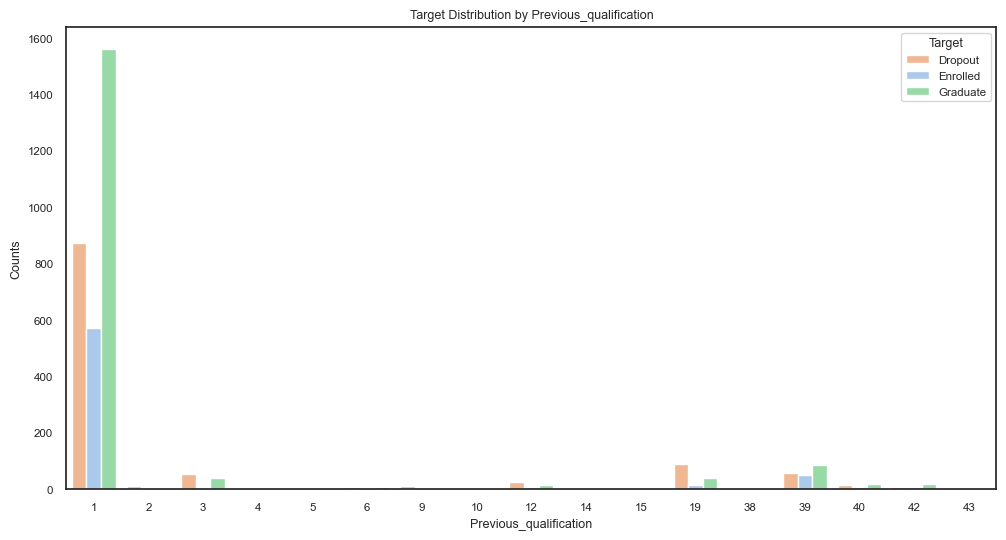

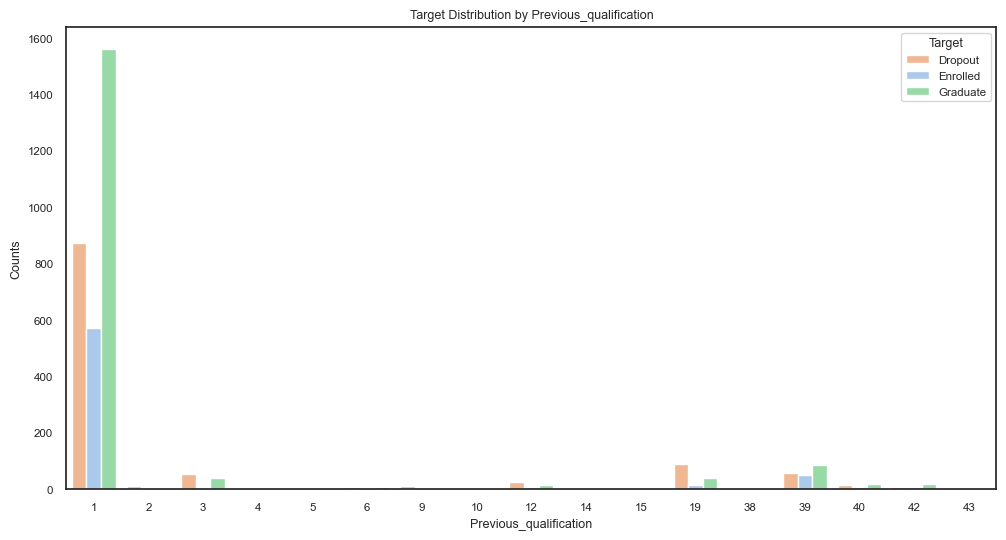

In [383]:
plot_target_by_categorical(
    data_cleaned_train,
    "id",
    'Previous_qualification',
    target,
    "count",
    color={
        "Dropout": '#ffb482',
        "Enrolled": '#a1c9f4',
        "Graduate": '#8de5a1'
    }
)

pqual_encoder_data = plot_target_by_categorical(
    data_cleaned_train,
    "id",
    'Previous_qualification',
    target,
    "count",
    color={
        "Dropout": '#ffb482',
        "Enrolled": '#a1c9f4',
        "Graduate": '#8de5a1'
        },
    static=False 
)


Diagram violin makin lebar makin banyak data 
- perbandingan distribusi 
- Mendapatkan Insight

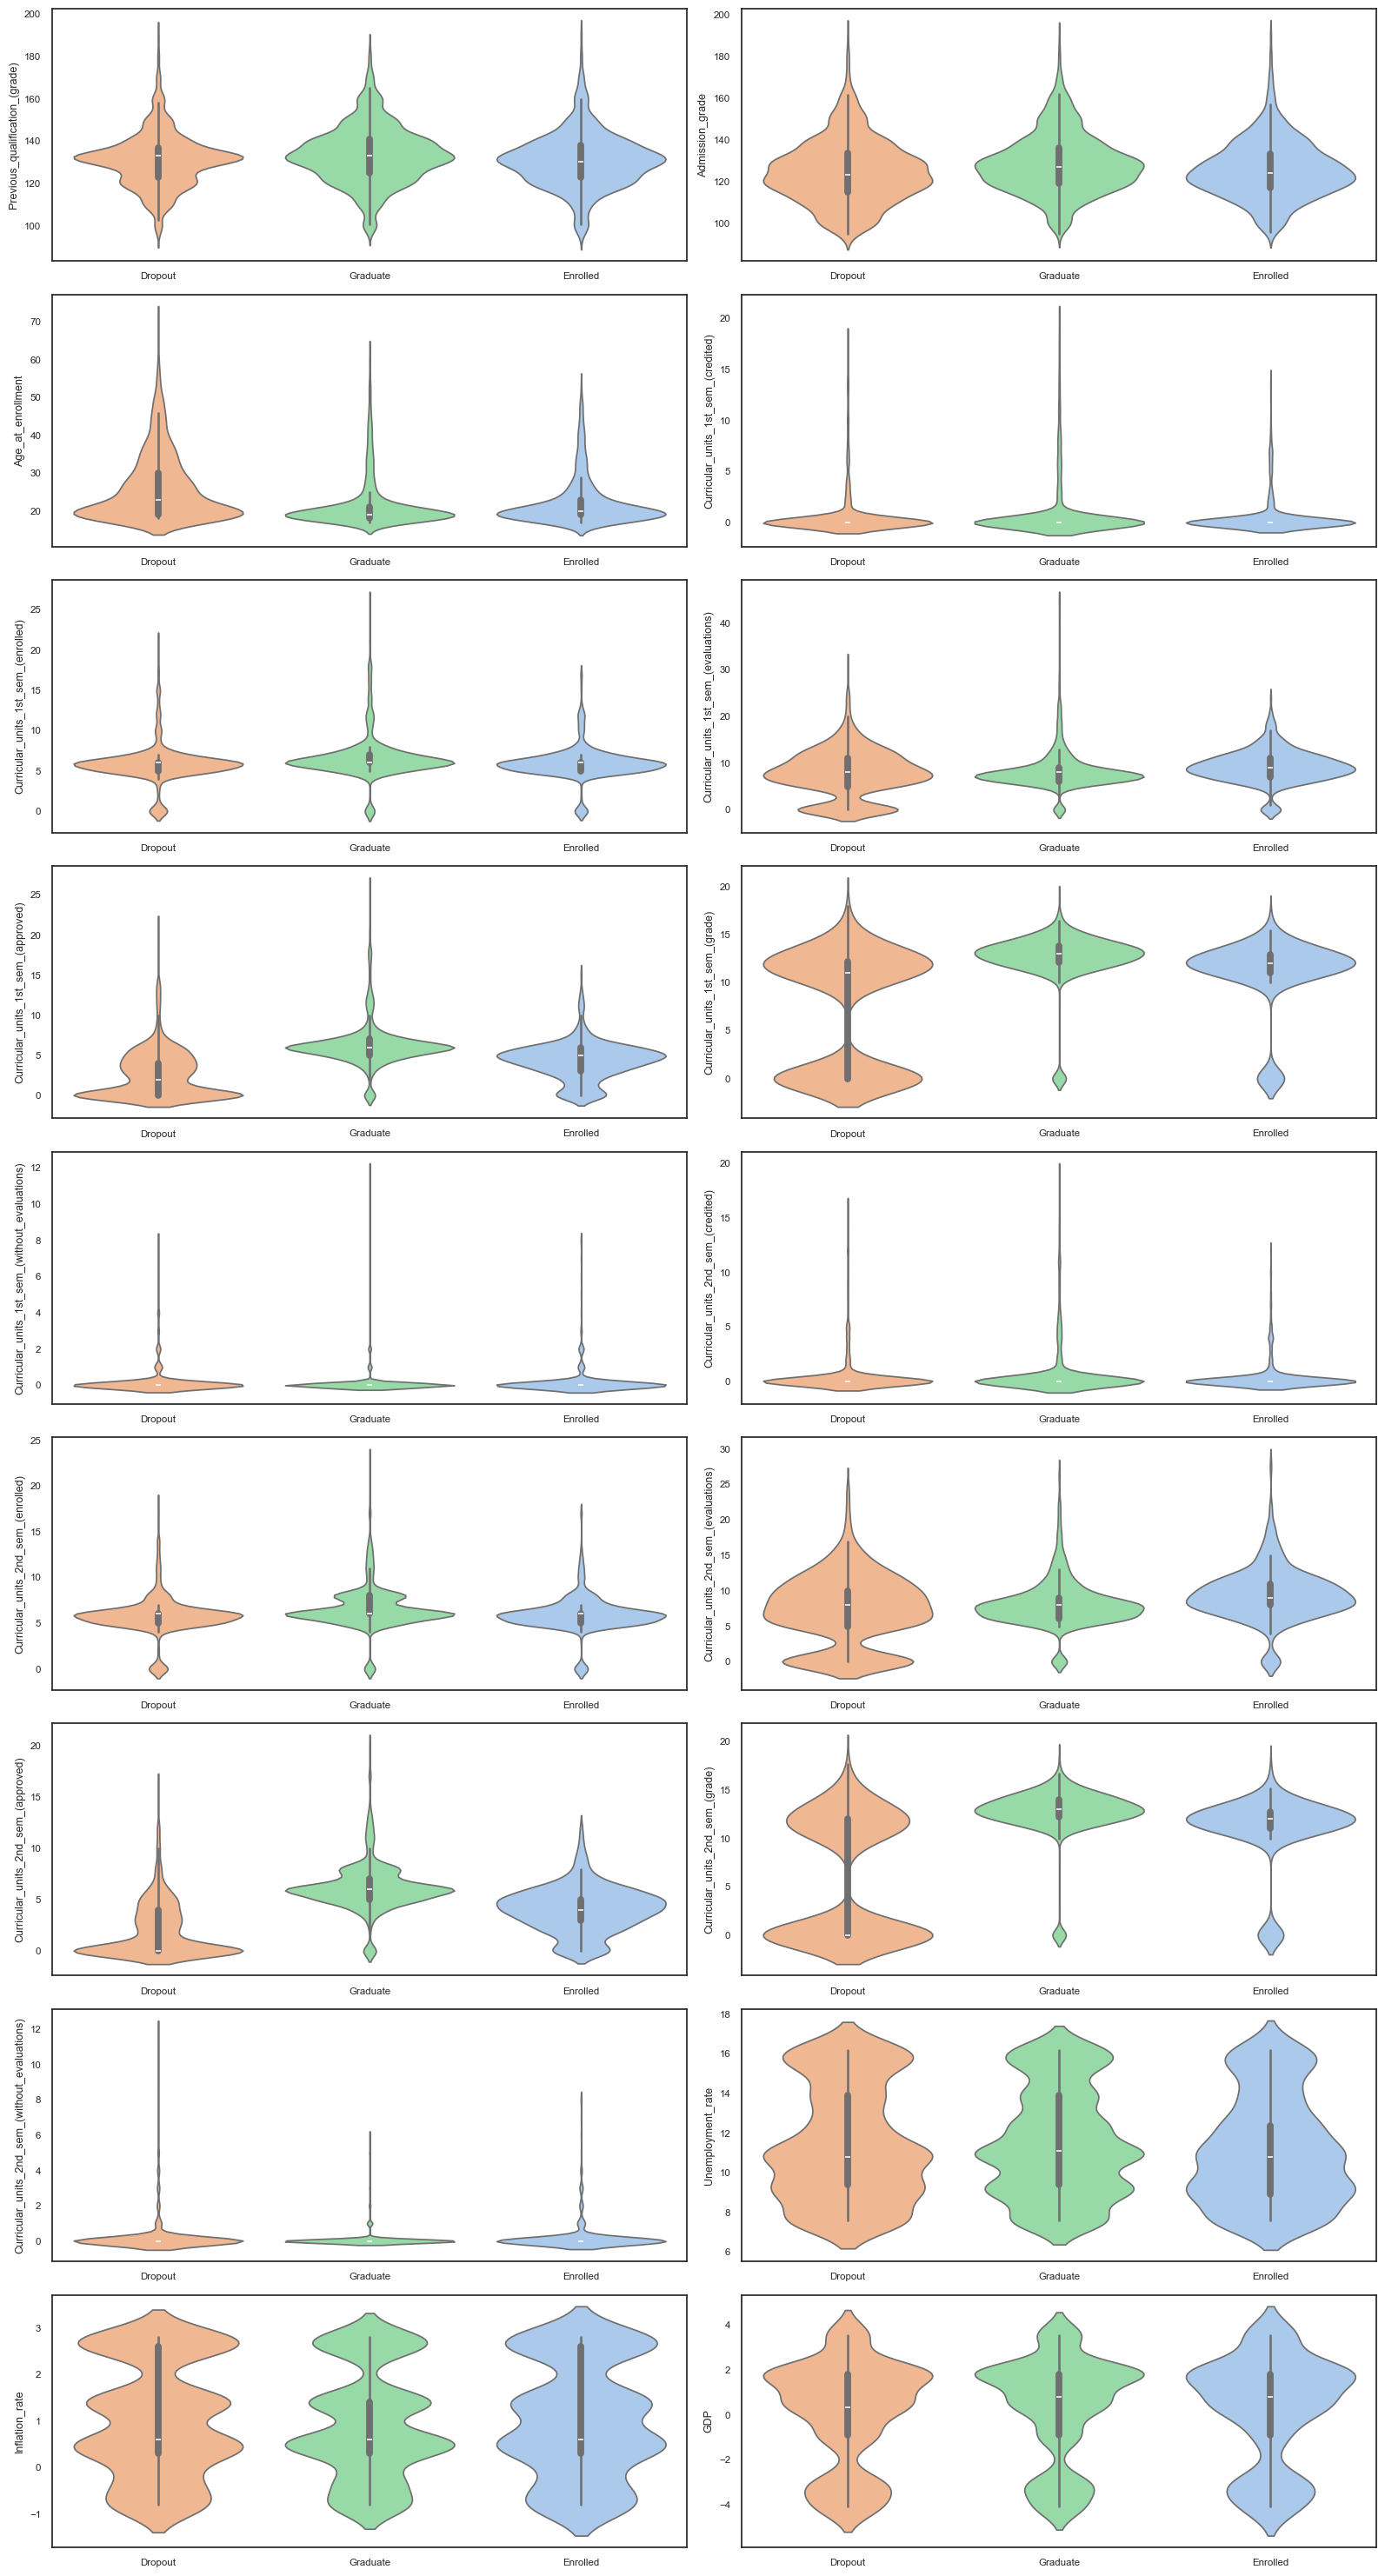

In [384]:
sns.set(style='white',font_scale=0.75)
fig1, ax1 = plt.subplots(int(np.ceil(len(num_col)/2)),2,figsize=(16,np.ceil(len(num_col)/2)*3.3))
ax1 = ax1.flatten()
for c in range(len(num_col)):
    sns.violinplot(data=data_cleaned_train, x=target,y=num_col[c], ax=ax1[c], 
                   palette={"Dropout":'#ffb482', "Enrolled":'#a1c9f4',"Graduate":'#8de5a1'}) #,split=True,annot_kws={"font_size": 4}
    ax1[c].set_xlabel('')
plt.tight_layout()

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi hasil pembagian data
print(f"\nJumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")


Jumlah data latih: 3204, Jumlah data uji: 801
